# R tidyverse quick example

 + R has had undergone a bit of a revolution of sorts in the past few years. 
 + There has been a coordinated effort to develop a collection of code focusing on the major use cases for data science. 
 + Posit (nee Rstudio), the developer of the well known R/python IDE, in specific, has been a major leader in this effort. 
 + However, there have also too many additional open source contributors to even try to mention a meaningful subset. 
 + The result is a really pleasant and easy to learn data science environment for so-called "tidy" data

## Tidy data
Let's start with the [definition of a tidy dataset](https://cran.r-project.org/web/packages/tidyr/vignettes/tidy-data.html). To quote:

```{note}
Tidy data is a standard way of mapping the meaning of a dataset to its structure. A dataset is messy or tidy depending on how rows, columns and tables are matched up with observations, variables and types. In tidy data:

1. Every column is a variable.
2. Every row is an observation.
3. Every cell is a single value.
```

+ The idea is, spend your time getting the data into a tidy format. 
+ This will make everything that follows so much easier, from summaries to plots to analyses. 
+ The set of tidyverse packages and functions (of course) focuses on tidy data, but nicely adds a common syntax and set of conventions. 
+ You can install the tidyverse with the R command `install.packages("tidyverse")`, which only needs to be done once. 
+ You can add the tidyverse to a conda environment with `conda install -c r r-tidyverse` .

In [1]:
## Loading tidyverse
## Install it first if needed
## install.packages("tidyverse")

library(tidyverse)

── Attaching packages ────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.6     ✔ purrr   0.3.4
✔ tibble  3.1.7     ✔ dplyr   1.0.9
✔ tidyr   1.2.0     ✔ stringr 1.4.0
✔ readr   2.1.2     ✔ forcats 0.5.1

── Conflicts ───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



Make note of the conflict `filter` which is both used to filter rows a dataframe and in signal processing. The `::` looks for functions in that package. You can use that if you want to quickly use a function without loading the package.

## Reading in a dataset

Let's read in our data that we worked with previously. Note the function `data` is taken in R, so it's best not to use it to define a dataset. Better to just use `dat` or something like that.

In [4]:
dat = read_csv("https://raw.githubusercontent.com/bcaffo/ds4bme_intro/master/data/kirby127a_3_1_ax_283Labels_M2_corrected_stats.csv", show_col_types = FALSE)
head(dat)

New names:
• `` -> `...1`


...1,rawid,roi,volume,min,max,mean,std,type,level
<dbl>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,kirby127a_3_1_ax.img,Telencephalon_L,531111,0,374,128.3013,51.8593,1,1
2,kirby127a_3_1_ax.img,Telencephalon_R,543404,0,300,135.0683,53.6471,1,1
3,kirby127a_3_1_ax.img,Diencephalon_L,9683,15,295,193.5488,32.2733,1,1
4,kirby127a_3_1_ax.img,Diencephalon_R,9678,10,335,193.7051,32.7869,1,1
5,kirby127a_3_1_ax.img,Mesencephalon,10268,55,307,230.8583,29.2249,1,1
6,kirby127a_3_1_ax.img,Metencephalon,159402,2,299,138.5200,52.2241,1,1


## Dropping columns
+ Let's get rid of the `X1` or `rawid` columns.
+ The pipe operator `%>%` is really useful. It funnels the output from the previous statement to the next. 
+ The negative signs in front of the variables mean to remove them.

In [9]:
dat = dat %>% select(-X1, -rawid)
dat %>% head

roi,volume,min,max,mean,std,type,level
Telencephalon_L,531111,0,374,128.3013,51.8593,1,1
Telencephalon_R,543404,0,300,135.0683,53.6471,1,1
Diencephalon_L,9683,15,295,193.5488,32.2733,1,1
Diencephalon_R,9678,10,335,193.7051,32.7869,1,1
Mesencephalon,10268,55,307,230.8583,29.2249,1,1
Metencephalon,159402,2,299,138.5200,52.2241,1,1


## Subsetting the data
Let's get the Type 1 Level 1 data. 

In [6]:
t1l1 = dat %>% filter(type == 1, level == 1)
t1l1

...1,rawid,roi,volume,min,max,mean,std,type,level
<dbl>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,kirby127a_3_1_ax.img,Telencephalon_L,531111,0,374,128.3013,51.8593,1,1
2,kirby127a_3_1_ax.img,Telencephalon_R,543404,0,300,135.0683,53.6471,1,1
3,kirby127a_3_1_ax.img,Diencephalon_L,9683,15,295,193.5488,32.2733,1,1
4,kirby127a_3_1_ax.img,Diencephalon_R,9678,10,335,193.7051,32.7869,1,1
5,kirby127a_3_1_ax.img,Mesencephalon,10268,55,307,230.8583,29.2249,1,1
6,kirby127a_3_1_ax.img,Metencephalon,159402,2,299,138.5200,52.2241,1,1
7,kirby127a_3_1_ax.img,Myelencephalon,4973,12,286,199.8497,36.6501,1,1
8,kirby127a_3_1_ax.img,CSF,109776,0,258,33.0193,26.3262,1,1


## Plotting using ggplot

+ Below, we create a bar plot using ggplot
+ The first line creates the base plot then adds the columns
+ The second line sets some style choices (font and axis font orientations)

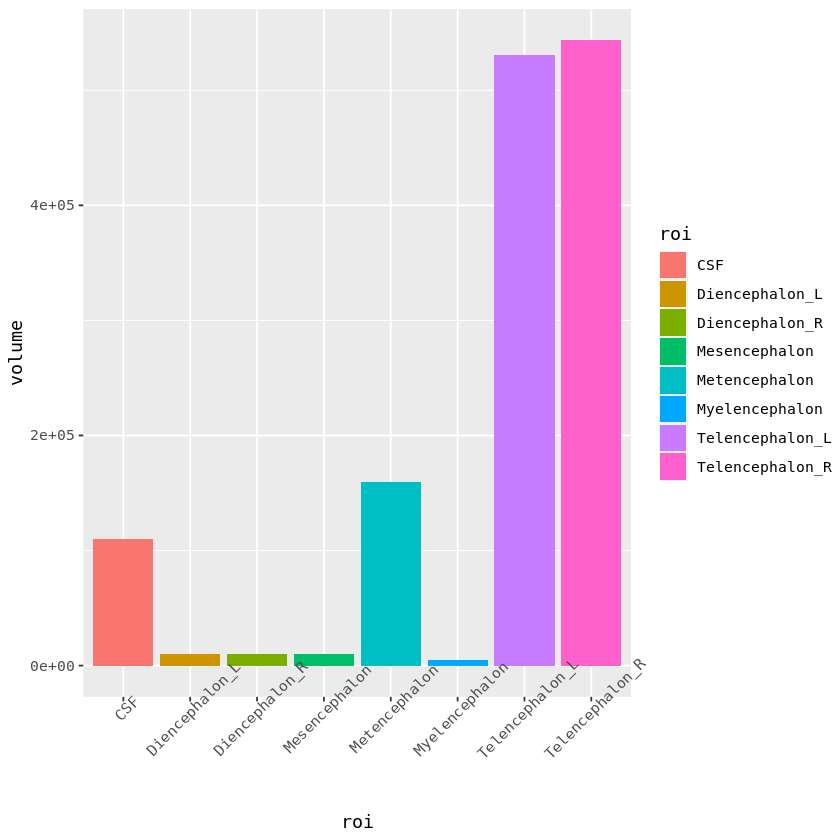

In [10]:
## Set the base plot and add the columns
g = ggplot(data = t1l1, aes(x = roi, y = volume, fill = roi), width = 4, height = 4) + geom_col()
g + theme(text=element_text(family="Consolas")) + theme(axis.text.x = element_text(angle = 45))